# Régressions linéaires

In [1224]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from common import *

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from typing import Any


## Headbrains - regression linéaire simple

Question que l'on se pose : est-ce que la taille du cervau est corrélée au poid ?

Une Variable de réponse : poid du cerveau, données quantitatives continue, indépendant
Facteur d'étude : taille du cerveau, données quantitatives continue, aparriée à la taille du cerveau

In [1225]:
data = pd.read_csv(get_dataset_dir('headbrain.csv'))

data.head()

data.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [1226]:
X = data['Head Size(cm^3)'].array.reshape(-1, 1)
y = data['Brain Weight(grams)'].array.reshape(-1, 1)

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6393117199570001

In [1227]:
reg.coef_

array([[0.26342934]])

In [1228]:
reg.intercept_

array([325.57342105])

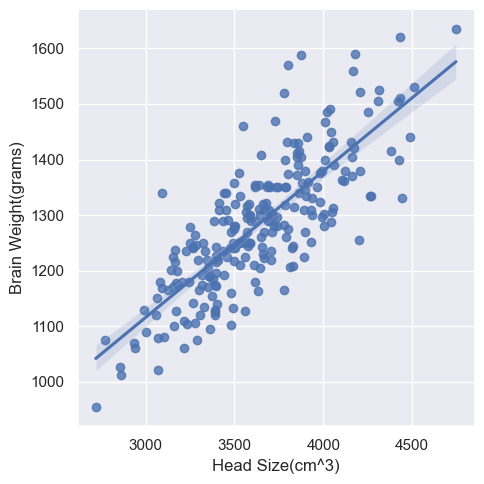

In [1229]:
sns.lmplot(x='Head Size(cm^3)', y='Brain Weight(grams)', data=data)

In [1230]:
model = sm.OLS(list(y), list(X)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          6.238e+04
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                   5.12e-288
Time:                        03:10:02   Log-Likelihood:                         -1372.2
No. Observations:                 237   AIC:                                      2746.
Df Residuals:                     236   BIC:                                      2750.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3521      0.001    249.762      0.000       0.349       0.355
==============================================================================
Omnibus:                        2.030   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.909
Skew:                          -0.009   Prob(JB):                        0.385
Kurtosis:                       3.439   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Iris - regression linéaire

Facteur d'étude : longueur et largeur des pétales, sépales, données quantitatives continue, indépendant
variable de réponse : mesure différentes de celle du facteur d'étude, données quantitatives continue, indépendants

Pourquoi pas approfondir l'étude. En ajoutant comme facteur d'étude l'espece.

On a alors une comparaison de la variable de réponse quantitative continue indépendante, un facteur qualitatif et un facteur continue.

--> On choisira alors une regression linéaire multiple étant donné la nature des données. On peut aussi utiliser une regression polynomiale, à voir quelle score obtenu est le plus haut.

In [1231]:
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(*[iris.data, iris.target], columns=iris.feature_names)
iris_df.index.name = 'species'

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2


In [1232]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 2
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


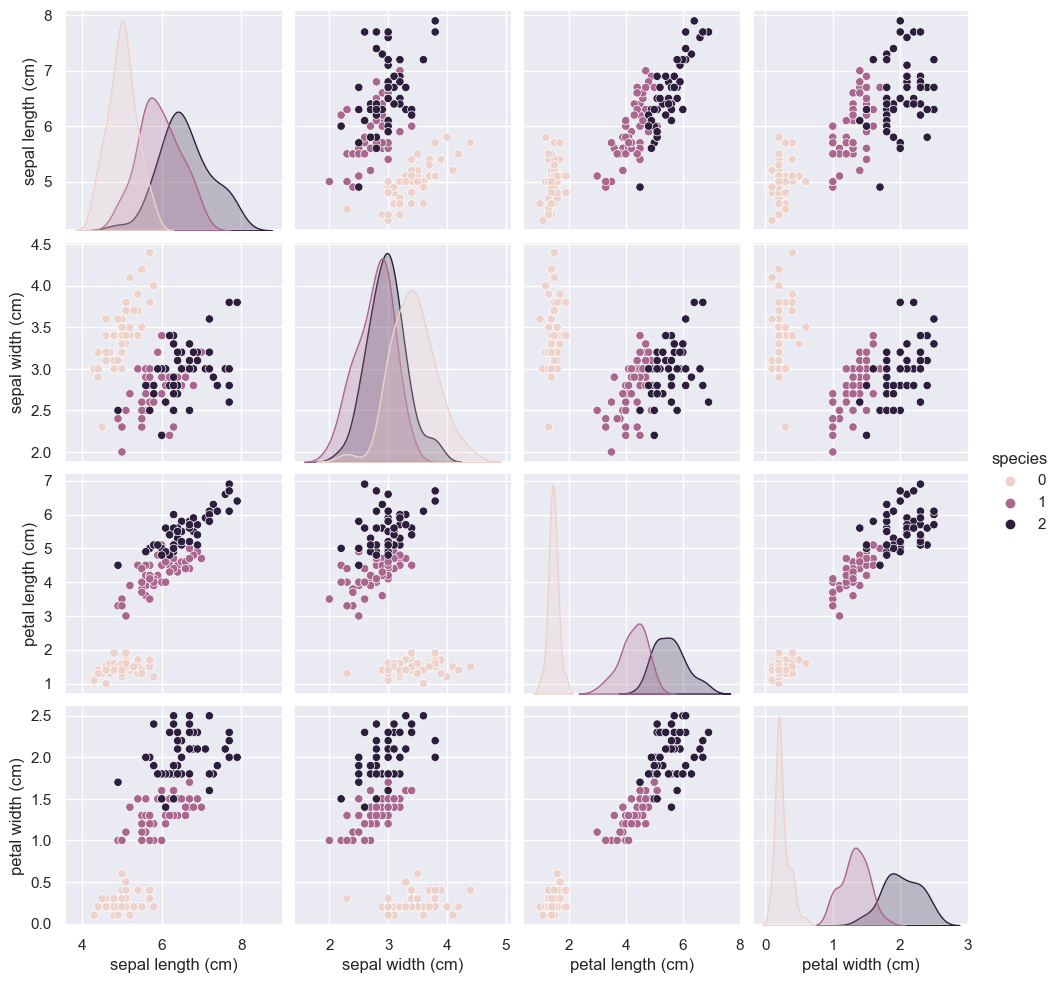

In [1233]:
sns.pairplot(iris_df.reset_index(), hue='species')

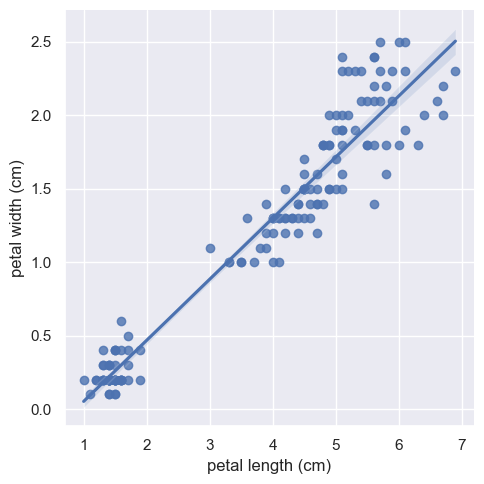

In [1234]:
sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=iris_df)


In [1235]:
X = iris_df['petal length (cm)'].array.reshape(-1, 1)
y = iris_df['petal width (cm)'].array.reshape(-1, 1)

model = sm.OLS(list(y), list(X)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              4417.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                   1.22e-112
Time:                        03:10:06   Log-Likelihood:                         -8.7179
No. Observations:                 150   AIC:                                      19.44
Df Residuals:                     149   BIC:                                      22.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3365      0.005     66.463      0.000       0.327       0.347
==============================================================================
Omnibus:                       19.720   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.498
Skew:                           0.957   Prob(JB):                     7.90e-06
Kurtosis:                       3.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1236]:
## Fix not really visible p-value in model summary but pvalue is 0.000 under P>|t| column

model.pvalues

array([1.21959966e-112])

In [1237]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9271098389904927

## Régression Linéaire Multiple & polynomiale

Les deux couvrent le même cas d'usage soit :

- une variable de réponse quantitative continue
- un facteur d'étude quantitatif continue en 2 groupes ou plus

In [1238]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

targets_df = pd.read_csv(
    data_url, sep="\s+", skiprows=7, nrows=14, usecols=[0], header=None
)[0]

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# :3 signigy until MEDV column
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

boston = pd.DataFrame(data, columns=targets_df.array)

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Note on hstack

- `[::2, :]`: Takes every second row starting from the first, and all columns.

- `[1::2, :2]` : Takes every second row starting from the second, and only the first two columns.

- `np.hstack()`: This function takes a tuple of arrays and stacks them horizontally.


### Étude

- Variable de réponse : suites de données quantitatives continues.
- Facteur d'étude : autres suites de données quantitatives continues (+ 2 groupes), assumées paramétriques.

In [1239]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [1240]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='MEDV', ylabel='Density'>

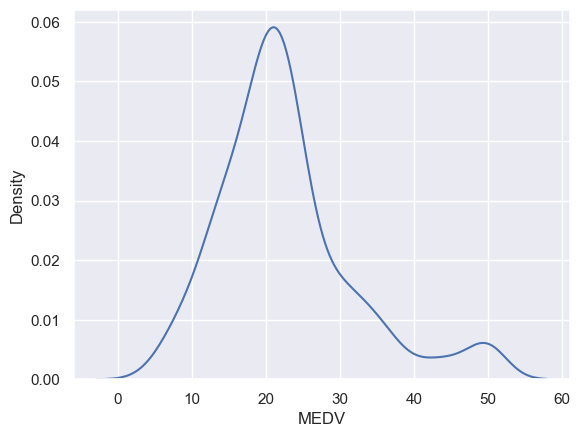

In [1241]:
sns.kdeplot(boston['MEDV'])

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

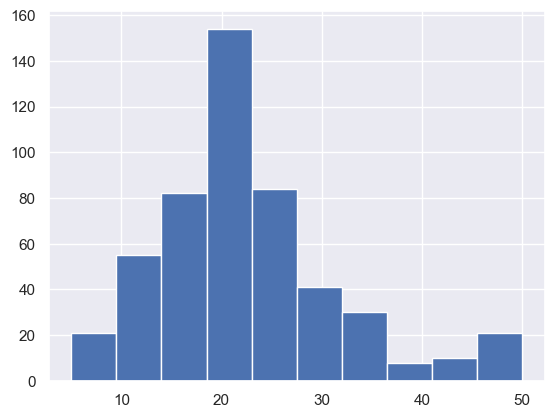

In [1242]:
plt.hist(boston['MEDV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b300b3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b3009810>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b311c2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b3008a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b3008cd0>],
 'means': []}

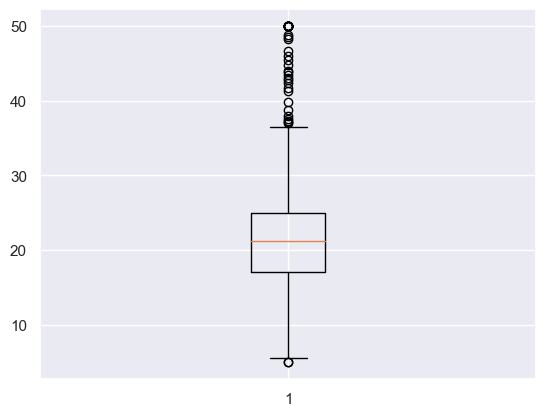

In [1243]:
plt.boxplot(boston['MEDV'])

In [1244]:
plt.figure(figsize=(10, 8))

corr_matrix = boston.corr().round(3)
corr_matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


<Figure size 1000x800 with 0 Axes>

#### Variables in order :

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's

<Axes: >

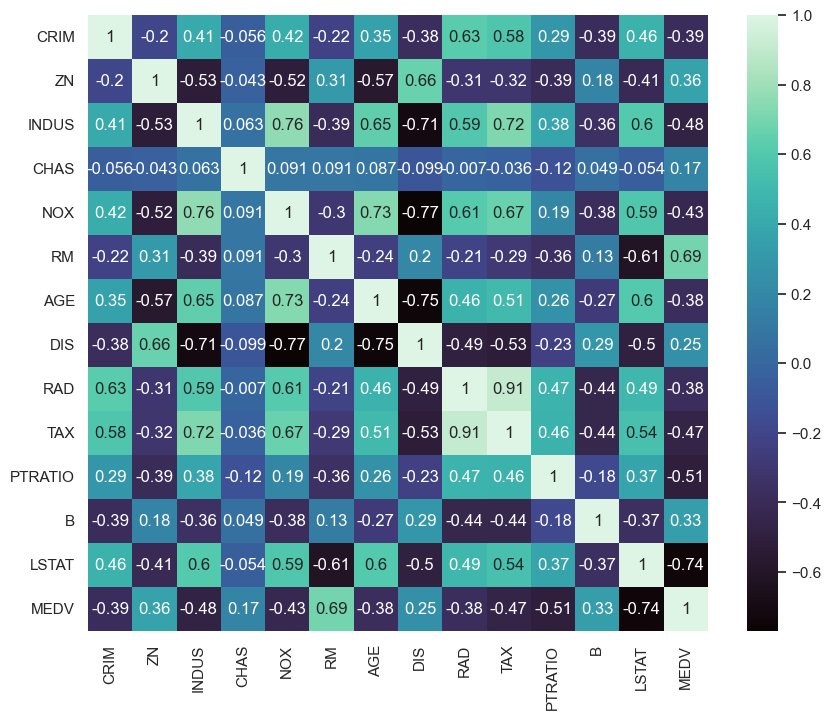

In [1245]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='mako')

Se lit par exemple :
- Le taux des propriétaires (MEDV) de leur maison est corrélé au taux de pièce par logement (RM) dans la zone à 69%.
> --> un peu évident
- Le taux de bas status de la population (LSTAT) est corrélé à 60% par rapport à la présence d'entreprises (non particulière/retail) (INDUS)
> --> Les populations les + pauvres sont + proches des zones industrielles


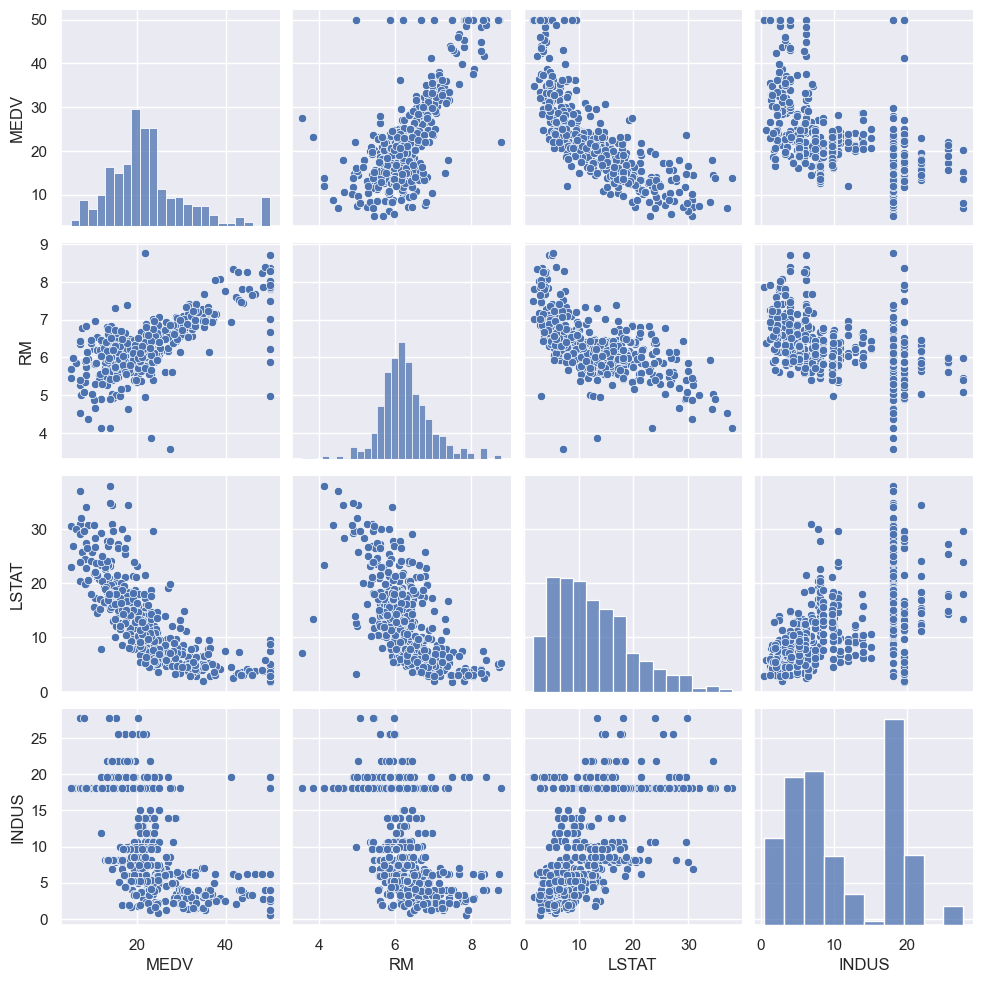

In [1246]:
sns.pairplot(data=boston[["MEDV", "RM", "LSTAT", "INDUS"]])

In [1247]:
# Toujours la variable de réponse dans X
Y = boston['MEDV']

# Et les facteurs d'étude dans y
X = boston[['RM', 'LSTAT', 'INDUS']]

X


,RM,LSTAT,INDUS
0,6.575,4.98,2.31
1,6.421,9.14,7.07
2,7.185,4.03,7.07
3,6.998,2.94,2.18
4,7.147,5.33,2.18
...,...,...,...
501,6.593,9.67,11.93
502,6.120,9.08,11.93
503,6.976,5.64,11.93
504,6.794,6.48,11.93


In [1248]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=10
)

numeric = ["RM", "LSTAT", "INDUS"]
sc = StandardScaler()

X_train[numeric] = sc.fit_transform(X_train[numeric])
X_test[numeric] = sc.transform(X_test[numeric])


In [1249]:
X_train.head()

,RM,LSTAT,INDUS
50,-0.411370,0.054971,-0.849233
367,-3.540126,0.037957,0.942398
34,-0.213216,1.031821,-0.489757
78,-0.010591,-0.102403,0.184621
172,-0.993915,0.230775,-1.077860


In [1250]:
X_test.head()

,RM,LSTAT,INDUS
305,0.561524,-0.585866,-1.346749
193,0.835663,-1.138801,-1.238906
65,0.075822,-1.189841,-1.175638
349,1.042756,-1.016871,-1.480474
151,-1.244215,0.030868,1.155208


In [1251]:

lin_modele = LinearRegression()

lin_modele.fit(X_train, y_train)


LinearRegression()

In [1252]:
lin_modele.intercept_

21.841831683168316

Si vous avez une équation de régression linéaire simple du type $$ y = mx + b $$, alors `lin_model.intercept_` correspond à $$ b $$.

- Représente la constante (aussi appelée ordonnée à l'origine) 
- C'est la valeur que prendrait la variable dépendante (y) lorsque toutes les variables indépendantes (x) sont égales à zéro.
- Plus concrètement, c'est comme le coût de base de la maison. On multiplie le prix pour chacun des facteurs démographiques ou de localisation pouvant avoir un impact sur le prix.


In [1253]:
lin_modele.coef_

array([ 2.94335573, -4.55451113, -0.47773376])

# L'équation

$$
Y_i = \beta_0 + \beta_1X + \epsilon
$$

Déterminons le prix d'un bien immobilier avec :

$$
Y_{bien} = 21.84 + (0.41 \times RM) + ((-0.612) \times LSTAT) + (-0.0851 \times INDUS)
$$


In [1254]:
y_predict = lin_modele.predict(X_test)

r2_score(y_test, y_predict)

0.6042072037480866

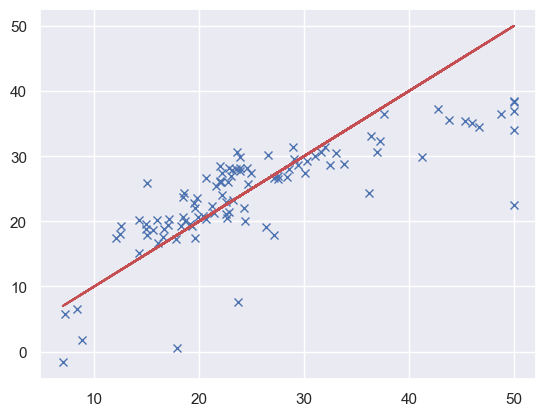

In [1255]:
plt.plot(y_test, y_predict, 'x', y_test, y_test, 'r--')

## Result showing some not enough correlated variables and extreme values are making the model less efficient

In [1256]:
from sklearn.preprocessing import PolynomialFeatures

### Exemple d'équation pour 2nd degré

Pour une régression polynomiale du second degré avec un taux comme variable de réponse **Y** (MEDV) et trois autres taux X_1 (RM), X_2 (LSTAT), X_3 (INDUS) comme variables explicatives, l'équation peut être formulée comme suit :

$$
\begin{equation}
\begin{aligned}
Y = & \beta_0 \quad && \text{(Constant)} \\
& + \beta_1X_1 + \beta_2X_1^2 \quad \\
& + \beta_3X_2 + \beta_4X_2^2 \quad \\
& + \beta_5X_3 + \beta_6X_3^2 \quad \\
& + \epsilon \quad && \text{(Error term)}
\end{aligned}
\end{equation}
$$


In [1262]:
def polynom(X: pd.DataFrame, Y: pd.Series, degree: int = 2):

    final_x = X.values.reshape(-1, 1)
    final_y = Y.values.reshape(-1, 1)

    # X And Y should match on size, by duplicating Y which is the single response variable
    y_matching_x_size = np.repeat(final_y, round(final_x.size / final_y.size))

    # Init polynomial regression
    features = PolynomialFeatures(degree=degree, include_bias=False)
    # fit to training data
    x_poly = features.fit_transform(final_x)

    # Add model parameters - training
    features.fit(x_poly, y_matching_x_size)

    # init regression equation to add poly features to
    poly_model = LinearRegression()

    poly_model.fit(x_poly, y_matching_x_size)

    # Generate data from fitted model
    train_predict = poly_model.predict(x_poly)

    # Evaluate model
    score = r2_score(y_matching_x_size, train_predict)

    print(f"Score for polynom of degree {degree} : {score}")

    return (train_predict, y_matching_x_size)


In [1263]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: MEDV, Length: 102, dtype: float64

Score for polynom of degree 2 : 0.07859624188412984


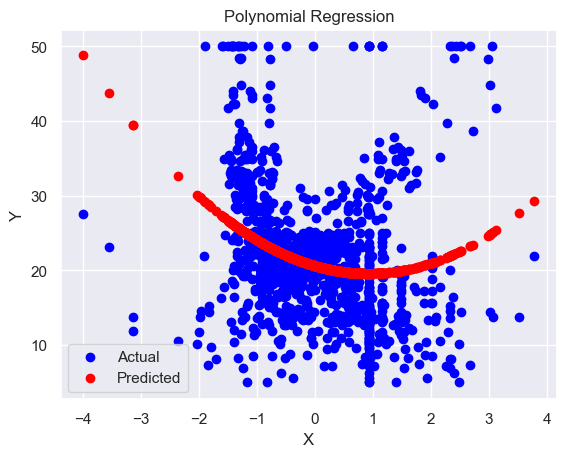

In [1264]:
y_train_predict, y_matching_x_size = polynom(X_train, y_train, degree=2)

def print_poly(X_train, y_train_predict, y_matching_x_size):
    sns.set(style="darkgrid")
    plt.scatter(X_train, y_matching_x_size, color='blue', label="Actual")
    plt.scatter(X_train, y_train_predict, color='red', label="Predicted")
    plt.title("Polynomial Regression")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()

print_poly(X_train,y_train_predict, y_matching_x_size)

# underfitting

Score for polynom of degree 2 : 0.07859624188412984
Score for polynom of degree 5 : 0.11708628604716098
Score for polynom of degree 8 : 0.14055105395511802
Score for polynom of degree 16 : 0.18577305839160174
Score for polynom of degree 12 : 0.17820504279041316


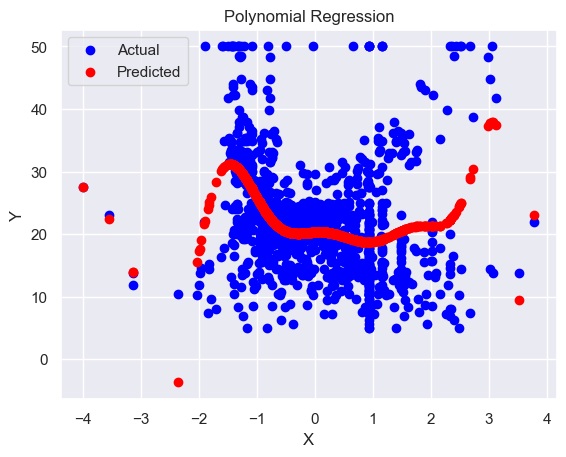

In [1265]:
polynom(X_train, y_train)
polynom(X_train, y_train, degree=5)
polynom(X_train, y_train, degree=8)
polynom(X_train, y_train, degree=16)

print_poly(X_train, *polynom(X_train, y_train, degree=12))

# Finding bias from degree 14 with score not growing a lot

# > 14 model looks overfitted

## Regression Logistique

#### Régression logistique simple :

- une variable de réponse qualitative (catégorielle / moyenne par catégorie par ex)
- un facteur d'étude quantitatif continue en 1 seul groupes de type quantitatif continue

#### Régression logistique multiple :

- Une variable de réponse qualitative (catégorielle / moyenne par catégorie par ex)
- Un facteur d'étude quantitatif continue en 2 groupes ou plus de type qualitatif ou/et quantitatif continue